### EDA on Global Terrorism

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
data = pd.read_csv(r"C:\Users\Raviraaj Roshan\OneDrive\Desktop\globalterrorismdb_0718dist.csv\globalterrorismdb_0718dist.csv", encoding = 'ISO-8859-1', low_memory=False)

In [16]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [17]:
type(data)

pandas.core.frame.DataFrame

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [21]:
data.shape

(181691, 135)

In [22]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [23]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


#### Data Preprocessing

In [28]:
data.rename(columns= {'iyear':'Year','imonth':'Month','country_txt':'Country',
                   'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target1',
                   'nkill':'Killed','nwound':'wounded','summary':'Summary','gname':'Group',
                   'targetype1_txt':'Target_type','weaptye1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [29]:
data.head()

,eventid,Year,Month,iday,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [30]:
data.columns

Index(['eventid', 'Year', 'Month', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [31]:
df=data

#### Number of Terrorist Attacks each Year

In [32]:
attacks_per_year = df['Year'].value_counts().sort_index()

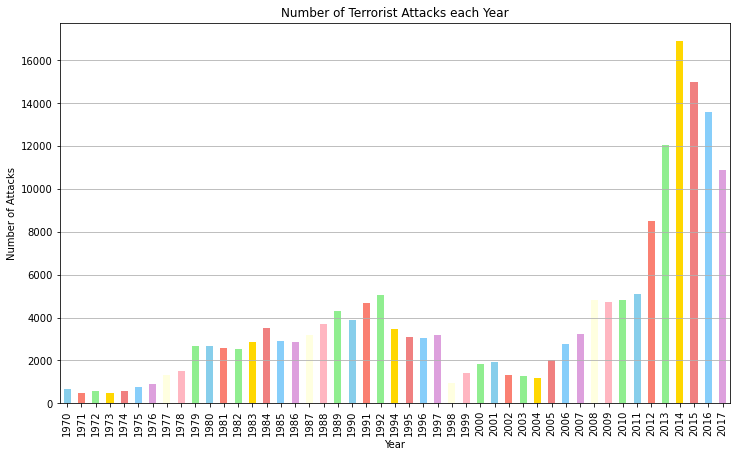

In [42]:
plt.figure(figsize =(12,7))
colors= ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightskyblue', 'plum', 'lightyellow', 'lightpink', 'lightgreen']
attacks_per_year.plot(kind='bar', color= colors)
plt.title('Number of Terrorist Attacks each Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(axis='y')
plt.show()

Numeric Summary

In [43]:
numerical_columns = ['Year', 'Month', 'iday']

num_sum= df[numerical_columns].describe()
print(num_sum)

                Year          Month           iday
count  181691.000000  181691.000000  181691.000000
mean     2002.638997       6.467277      15.505644
std        13.259430       3.388303       8.814045
min      1970.000000       0.000000       0.000000
25%      1991.000000       4.000000       8.000000
50%      2009.000000       6.000000      15.000000
75%      2014.000000       9.000000      23.000000
max      2017.000000      12.000000      31.000000


#### Distribution of Attack Types

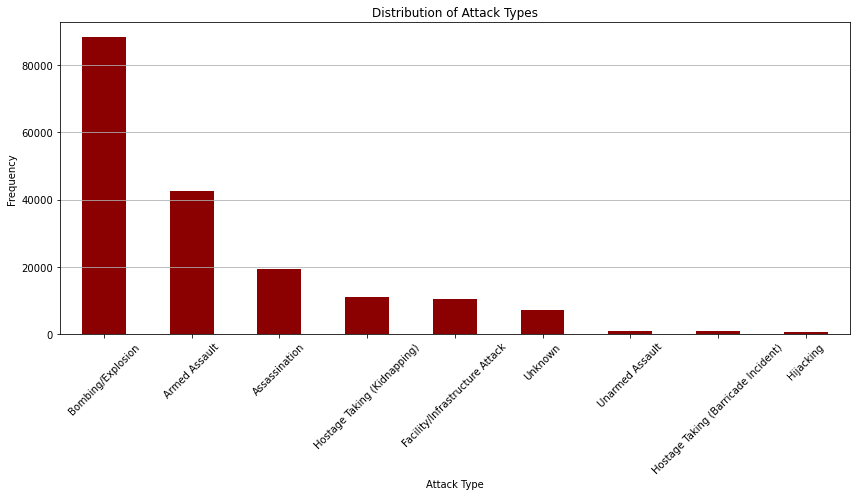

In [49]:
attack_type_cnt= df['AttackType'].value_counts()

plt.figure(figsize=(12,7))
attack_type_cnt.plot(kind='bar', color='darkred')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type'"Google Play Store EDA.ipynb")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Numerical Values

In [51]:
print("Attack Types and Frequencies:")
print(attack_type_cnt)

Attack Types and Frequencies:
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


#### Number of Terrorist Attacks by Country

In [53]:
country_attacks = df['Country'].value_counts()

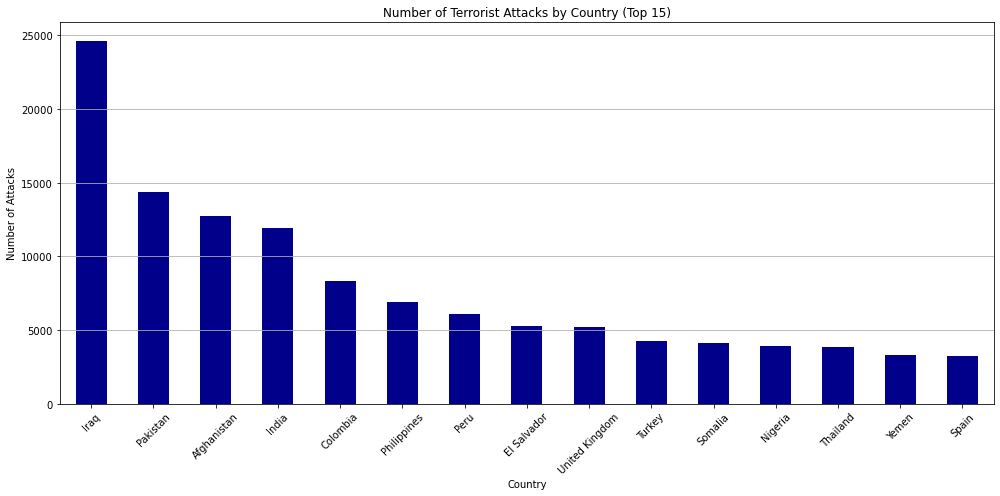

In [56]:
plt.figure(figsize=(14,7))
country_attacks.head(15).plot(kind='bar', color='darkblue')
plt.title("Number of Terrorist Attacks by Country (Top 15)")
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation =45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Numerical values

In [58]:
print("Country-wise Attacks (Top 15):")
print(country_attacks.head(15))

Country-wise Attacks (Top 15):
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64


#### Word Cloud 

In [64]:
countries_involved = df['Country'].dropna()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(countries_involved))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Countries Involved in Terrorist Incidents')
plt.axis('off')
plt.tight_layout()
plt.show()

ValueError: Only supported for TrueType fonts

In [62]:
!pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [63]:
!pip install --upgrade Pillow

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.6 MB 1.9 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.6 MB 1.7 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 2.0 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1


Target Types

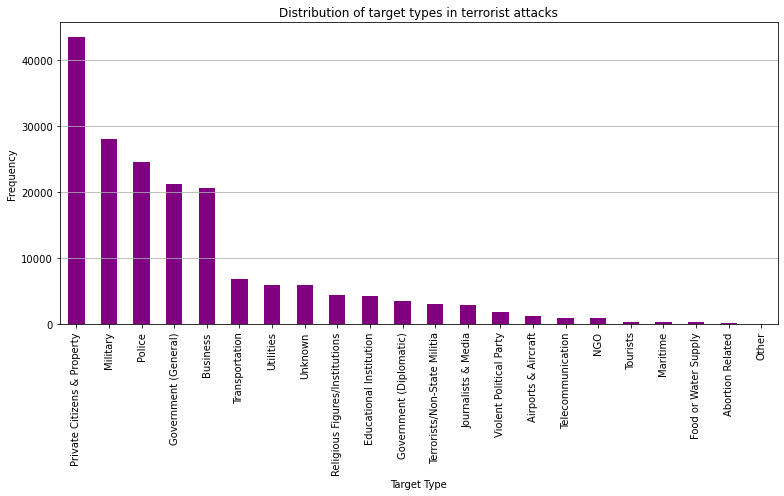

In [70]:
target_type_cnt= df['targtype1_txt'].value_counts()

plt.figure(figsize=(11,7))
target_type_cnt.plot(kind='bar', color='purple')
plt.title('Distribution of target types in terrorist attacks')
plt.xlabel('Target Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Numerical Values

In [71]:
print('Target types and frequencies:')
print(target_type_cnt)

Target types and frequencies:
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64


#### Comparison: People Wounded vs. People Killed (Yearly basis)

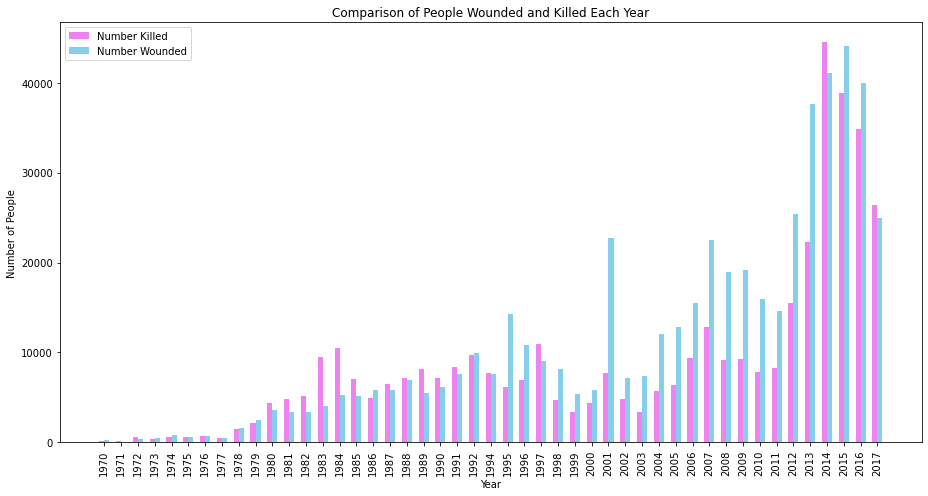

In [84]:
yearly_casualties = df.groupby('Year')[['Killed', 'wounded']].sum()

plt.figure(figsize=(13,7))
bar_width=0.30
index= np.arange(len(yearly_casualties))

plt.bar(index, yearly_casualties['Killed'], bar_width, label='Number Killed', color='violet')
plt.bar(index + bar_width, yearly_casualties['wounded'], bar_width, label='Number Wounded', color='skyblue')

plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Comparison of People Wounded and Killed Each Year')
plt.xticks(index + bar_width / 2, yearly_casualties.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

#### Number of People killed in Each Attack Type


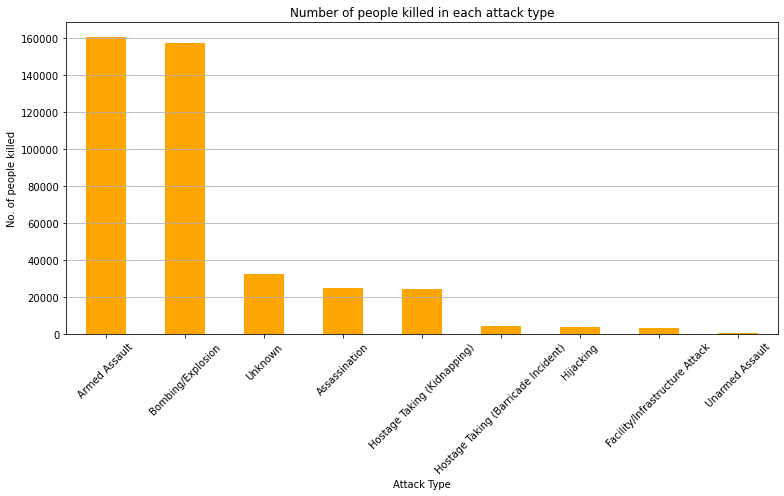

In [85]:
attack_type_killed = df.groupby('AttackType')['Killed'].sum().sort_values(ascending=False)

plt.figure(figsize=(11,7))
attack_type_killed.plot(kind='bar', color='orange')
plt.title('Number of people killed in each attack type')
plt.xlabel('Attack Type')
plt.ylabel('No. of people killed')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Numeric values

In [86]:
attacktype_killed=df[["AttackType","Killed"]].groupby("AttackType").sum().sort_values(by="Killed",ascending=False)
attacktype_killed

,Killed
AttackType,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


#### Top 5 most affected countries 

In [88]:
top_countries= df['Country'].value_counts().head(5)
print('\nTop 5 most affected countries:')
print(top_countries)


Top 5 most affected countries:
Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64


#### Trend of Terrorist Attacks over Time

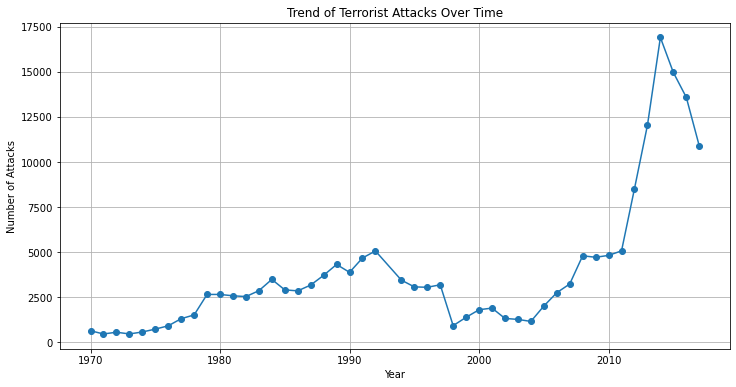

In [91]:
plt.figure(figsize=(12, 6))
attacks_over_time = df['Year'].value_counts().sort_index()
plt.plot(attacks_over_time.index, attacks_over_time.values, marker='o', linestyle='-')
plt.title('Trend of Terrorist Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

##### From the comprehensive Exploratory Data Analysis (EDA) conducted, several key insights can be derived:



Total Casualties: The total number of people killed and wounded due to terrorist incidents.

Killed:411868

Wounded:523869

Total Casualties= 935737

Top Affected Countries: Identifying the top countries most affected by terrorist activities.

Iraq
Pakistan
Afghanistan
India
Colombia